In [1]:
%matplotlib inline
import matplotlib as mpl
from matplotlib import pyplot as plt
import matplotlib.patheffects as path_effects
from matplotlib.collections import LineCollection
from matplotlib.patches import Rectangle,ConnectionPatch
from matplotlib.gridspec import GridSpec

typeface='Helvetica Neue'
mpl.rcParams['font.weight']=300
mpl.rcParams['axes.labelweight']=300
mpl.rcParams['font.family']=typeface
mpl.rcParams['font.size']=22
mpl.rcParams['pdf.fonttype']=42

import os,glob
import numpy as np
# from Bio import SeqIO
# from collections import Counter

import baltic as bt

import cartopy
import cartopy.crs as ccrs

# from matplotlib.patches import ConnectionPatch

locs={}
loc_size={'town': 1, 'county': 2, 'country': 3}

coordinates={'Liège': (50.63373,5.56749,'town'), 
             'England': (51.509865,-0.118092,'country'), 
             'Rhineland-Palatinate': (49.992863,8.247253,'county'), 
             'Geneva': (46.204391,6.143158,'county'), 
             'Sint-Joost-ten-Node': (50.85,4.383333,'town'), 
             'Vilniaus_apskritis': (54.68916,25.2798,'county'), 
             'Lower_Saxony': (52.373920,9.735603,'county'), 
             'Bavaria': (48.777500,11.431111,'county'), 
             'La_Roche-sur-Yon': (46.670502,-1.426000,'town'), 
             'Issoire': (45.55,3.25,'town'), 
             'Alytus': (54.4000,24.0500,'county'), 
             'Alytaus_apskritis': (54.4000,24.0500,'county'), 
             'Maryland': (39.045753,-76.641273,'country'), 
             'Pontoise': (49.051601,2.101700,'town'), 
             'Taurages': (55.25222, 22.28972,'county'), 
             'Taurages_apskritis': (55.25222, 22.28972,'county'), 
             'Utenos': (55.5,25.6,'county'), 
             'Kaunas': (54.90272,23.90961,'county'), 
             'Kauno': (54.90272,23.90961,'county'), 
             'Kauno_apskritis': (54.90272,23.90961,'county'), 
             'Marijampole': (54.56667, 23.35,'county'), 
             'Marijampoles': (54.56667, 23.35,'county'), 
             'Utenos_apskritis': (55.5,25.6,'county'), 
             'Siauliu_apskritis': (55.934908,23.313682,'county'), 
             'Siauliu': (55.934908,23.313682,'county'), 
             'Panevezio': (55.7333,24.3500,'county'), 
             'Panevezio_apskritis': (55.7333,24.3500,'county'), 
             'Vilassar_De_Mar': (41.50408,2.39226,'town'), 
             'Utena': (55.5,25.6,'county'), 
             'Germany': (52.531677,13.381777,'country'), 
             'Vilnius': (54.68916,25.2798,'county'), 
             'Vilniaus': (54.68916,25.2798,'county'), 
             'Asse': (50.91011,4.19836,'town'), 
             'West_Virginia': (32.784618,-79.940918,'country'), 
             'Cluses': (46.060390,6.580582,'town'), 
             'CLUSES': (46.060390,6.580582,'town'), 
             'CAR': (6.6194,20.9367,'country'), 
             'Hauts-de-France': (50.629250,3.057256,'county'), 
#              'Equatorial Guinea': (1.6195,10.3178,'country'), 
#              'Central African Republic': (16.346400, 3.436900,'town'), ## park coordinates
             'Central_African_Republic': (4.36122,18.55496,'town'), ## Bangui
             'Olomouc_Region': (49.593778,17.250879,'county'), 
             'Le_Havre': (49.490002,0.100000,'town'), 
             'Lochristi': (51.097461,3.837824,'town'), 
             'Buggenhout': (51.0159,4.20173,'town'), 
             'Mali': (12.635898,-7.971547,'country'), 
             'Cameroon': (3.844119, 11.501346,'country'), 
             'Equatorial_Guinea': (3.75578,8.78166,'country'),
             'Neder-Over-Heembeek': (50.9057, 4.3922,'town'), 
             'France': (48.864716,2.349014,'country'), 
             'Vilassar De Dalt': (41.517, 2.367,'town'), 
             'Dublin': (53.350140,-6.266155,'town'), 
             'Ile-de-France': (48.5000,2.5000,'county'), 
             'Basel-Landschaft': (47.559601,7.588576,'county'), 
             'Marseille': (43.296398,5.370000,'town'), 
             'Brno': (49.19522,16.60796, 'town'), 
             'Portugal': (38.736946,-9.142685,'country'), 
             'Orleans': (47.90289,1.90389,'town'), 
             'Vaud': (46.478176,6.238849,'town'), 
             'Merelbeke': (50.994550,3.745640,'town'), 
             'Bremen': (53.07516,8.80777,'town'), 
             'Nantes': (47.218102,-1.552800,'town'), 
             'Mecklenburg-Western_Pomerania': (53.629593,11.414763,'county'), 
             'Walcourt': (50.2540,4.4380,'town'), 
             'Bangui': (4.36122,18.55496,'town'), 
             'Prague': (50.073658,14.418540,'town'), 
             'Minnesota': (46.392410,-94.636230,'country'), 
             'Bern': (46.947456,7.451123,'town'), 
             'Yaounde': (3.844119,11.501346,'town'), 
             'Troyes': (48.299702,4.079200,'town'), 
             'Viken': (59.751,10.025,'county'), 
             'Kinshasa': (-4.322447,15.307045,'town'), 
             'Puteaux': (48.884998,2.238900,'town'), 
             'Texas': (29.749907,-95.358421,'country'), 
             'Michigan': (44.182205,-84.506836,'country'), 
             'Quimperle': (47.86667, -3.55,'town'), 
             'Chateaulin': (48.195,4.091,'town'), 
             'Quimper': (47.996700,-4.096400,'town'), 
             'Chambrey_Les_Tours': (47.3354,0.7029,'town'), 
             'Niel': (51.11096,4.33428,'town'), 
             'Liege': (50.632557,5.579666, 'town'), 
             'Augsburg': (48.366512,10.894446,'town'), 
             'Vorst': (51.083,5.067,'town'), 
             'Accra': (5.614818,-0.205874,'town'), 
             'Scotland': (55.953251,-3.188267,'country'), 
             'Alberta': (55.000000,-115.000000,'country'), 
             'South_Korea': (37.532600,127.024612,'country'), 
             'Bayanga': (6.611111,20.939444,'town'), 
             'Washington': (47.751076,-120.740135,'country'), 
             'Normandie': (49.490002,0.100000,'county'), 
             'Valais': (46.383013,6.860901,'county'), 
             'Brussels': (50.85045,4.34878,'town'), 
             'Brussels_Capital_Region': (50.85045,4.34878,'town'), 
             'Hautes-Pyrenees': (43.0193924,0.1494988,'county'), 
             'Loire_Atlantique': (47.34816145,-1.87274612146193,'county'), 
             'Baden-Wurttemberg': (48.758339,8.243008,'county'), 
             'North_Rhine-Westphalia': (50.733334,7.100000,'county'), 
             'Notre-Dame-de-Sanilhac': (45.121311,0.713850,'town'), 
             'Ghent': (51.049999,3.733333,'town'), 
             'Paris': (48.864716,2.349014,'town'), 
             'Indiana': (40.273502,-86.126976,'country'), 
             'Hong_Kong': (22.302711,114.177216,'town'), 
             'Amiens': (49.894066,2.295753,'town'), 
             'Grand-Est': (48.580002,7.750000,'county'), 
             'Tours': (47.394144,0.684840,'town'), 
             'Central_Visayas': (10.3095549,123.8931107,'county'), 
             'Padova': (45.406435,11.876761,'town'), 
             'Belluno': (46.142463,12.216709,'town'), 
             'Lambarene': (-0.7001, 10.24055,'town'), 
             'Gavleborg': (60.674880,17.141273,'county'), 
             'Grenoble': (45.171547,5.722387,'town'), 
             'Cergy_Pontoise': (49.03894, 2.07805,'town'), 
             'Lyon': (45.763420, 4.834277,'town'), 
             'Apulia': (41.125278,16.866667,'town'), 
             'New_Jersey': (39.833851,-74.871826,'country'), 
             'Neuchatel': (46.989987,6.929273,'town'), 
             'Veneto': (45.438759,12.327145,'county'), 
             'Centre-Val_de_Loire': (47.902500, 1.909000,'county'), 
             'Basel-Stadt': (47.559601,7.588576,'town'), 
             'Hamburg': (53.551086,9.993682,'town'), 
             'Illinois': (39.799999,-89.650002,'country'), 
             'Ecuires': (50.4439,1.76528,'town'), 
             'Uusimaa': (60.192059,24.945831,'county'), 
             'Le_Mans': (48.008224,0.209856,'town'), 
             'Moravian-Silesian_Region': (49.820923,18.262524,'county')}

travel={}
for line in open('/Users/evogytis/Documents/manuscripts/SARS-CoV-2_kitenis/data/travel_qc_info.csv','r'):
    l=line.strip('\n').split('\t')
#     print(l[3])
    if l[0]!='Virus name':
        locs[l[0].replace(' ','_')]=[c.strip(' ').replace(' ','_') for c in l[3].split('/')][-1]
        if l[4]!='':
            travel[l[0]]=l[4]

locs['hCoV-19/Belgium/ULG-12917/2021']='Liege'
locs['hCoV-19/Belgium/rega-5050/2021']='Brussels'

locs['hCoV-19/Belgium/Aalst-OLVZ-8042639/2021']='Asse'
locs['hCoV-19/Belgium/UGent-4359/2021']='Lochristi'
locs['hCoV-19/Belgium/UGent-4369/2021']='Buggenhout'

locs['hCoV-19/Belgium/UGent-4966/2021']='Merelbeke'
locs['hCoV-19/Belgium/UGent-5440/2021']='Merelbeke'

locs['hCoV-19/Belgium/IPG-282/2021']='Walcourt'

locs['hCoV-19/Belgium/UZA-UA-21050048/2021']='Niel'
locs['hCoV-19/Belgium/UGent-5664/2021']='Lochristi'
locs['hCoV-19/Belgium/UGent-5688/2021']='Lochristi'
locs['hCoV-19/Belgium/UGent-5690/2021']='Lochristi'
locs['hCoV-19/Belgium/UGent-5708/2021']='Lochristi'
locs['hCoV-19/Belgium/UGent-5861/2021']='Lochristi'

locs['hCoV-19/Belgium/UGent-5728/2021']='Merelbeke'

locs['hCoV-19/Belgium/rega-6642/2021']='Brussels'
locs['hCoV-19/Belgium/MBLGPF541707/2021']='Brussels'
locs['hCoV-19/Belgium/ULG-16426/2021']='Brussels'

locs['hCoV-19/Belgium/ULG-16502/2021']='Liege'
locs['hCoV-19/Belgium/rega-9607/2021']='Brussels'
locs['hCoV-19/Belgium/rega-8902/2021']='Brussels'
locs['hCoV-19/France/IDF-HB_112105002606/2021']='Ile-de-France'


# locs['hCoV-19/CAR/245/2021']='CAR'
# locs['hCoV-19/CAR/242/2021']='CAR'
# locs['hCoV-19/CAR/226/2021']='CAR'
# locs['hCoV-19/CAR/229/2021']='CAR'
# locs['hCoV-19/CAR/237/2021']='CAR'
# locs['hCoV-19/CAR/234/2021']='CAR'
# locs['hCoV-19/CAR/235/2021']='CAR'


colours={}
for line in open('/Users/evogytis/Documents/manuscripts/SARS-CoV-2_kitenis/colours.csv','r'):
    loc,colour=line.strip('\n').split('\t')
    colours[loc]=colour

colours['Cameroun']=colours['Cameroon']
# alnL=0
# seqs={}
# for seq in SeqIO.parse('/Users/evogytis/Documents/manuscripts/SARS-CoV-2_kitenis/data/alignments/core.fasta','fasta'):
#     alnL=len(seq.seq)
#     seqs[seq.id]=str(seq.seq)

alnL=29903
ll=bt.loadNewick('/Users/evogytis/Documents/manuscripts/SARS-CoV-2_kitenis/data/trees/core.newick')

ll=ll.collapseBranches(lambda k: k.length<1/50000)

for k in ll.Objects:
    k.length=k.length*alnL

# travel_cases=[s for s in seqs if s.split('|')[0] in travel]
# ca=ll.commonAncestor(ll.getExternal(lambda k: k.name.split('|')[0] in travel))
ca=ll.getExternal(lambda k: k.name=='hCoV-19/Central_African_Republic/234/2021|EPI_ISL_2365409|2021-03-31')[0].parent

ll=ll.subtree(ca)
# ll=ll.subtree(ca.parent) ## grab Czech "outgroup" too
ll.root.length=0.3
ll.traverse_tree()


print('done')
def get_mean_coordinate(k):
    coords=[]
    if k.is_node():
        for ch in k.leaves:
            if len(ch.split('|'))==4:
                loc=ch.split('|')[1]
            else:
                loc=ch.split('|')[0]
            loc=loc.replace(' ','_')
            lon,lat,s=coordinates[locs[loc]]
#             coords.append((lon,lat))
            coords.append(lon)
    else:
        if len(k.name.split('|'))==4:
            loc=k.name.split('|')[1]
        else:
            loc=k.name.split('|')[0]
        loc=loc.replace(' ','_')
        lon,lat,s=coordinates[locs[loc]]
#         coords.append((lon,lat))
        coords.append(lon)
#     print(coords)
#     print(k.y,ll.ySpan)
    return -np.mean(coords) if k.y<ll.ySpan/2 else np.mean(coords)

ll.drawTree()
ll.sortBranches(sort_function=get_mean_coordinate)

#############
siblings=[]

all_tips=ll.getExternal()
print('at %d tips'%(len(all_tips)))

for k in ll.getInternal(): ## iterate over internal nodes
#     sibs=[w for w in k.children if w.is_leaf() and w.length<1] ## get siblings that are tips with fewer than 1 mutation
    sibs=[w for w in k.children if w.is_leaf()] ## get siblings that are tips
    if len(sibs)>1:
        siblings.append(sibs)

for s in siblings:
    sib_locs=set([coordinates[locs[w.name.split('|')[0]]] for w in s])
    
    same_loc={c: [ch for ch in s if coordinates[locs[ch.name.split('|')[0]]]==c] for c in sib_locs}
    
    for loc in same_loc:
        if len(same_loc[loc])>1:
            for ch in same_loc[loc][1:]:
                all_tips.remove(ch)

print('reduced to %d tips'%(len(all_tips)))

# ll=ll.reduceTree(all_tips)

done
at 603 tips
reduced to 285 tips


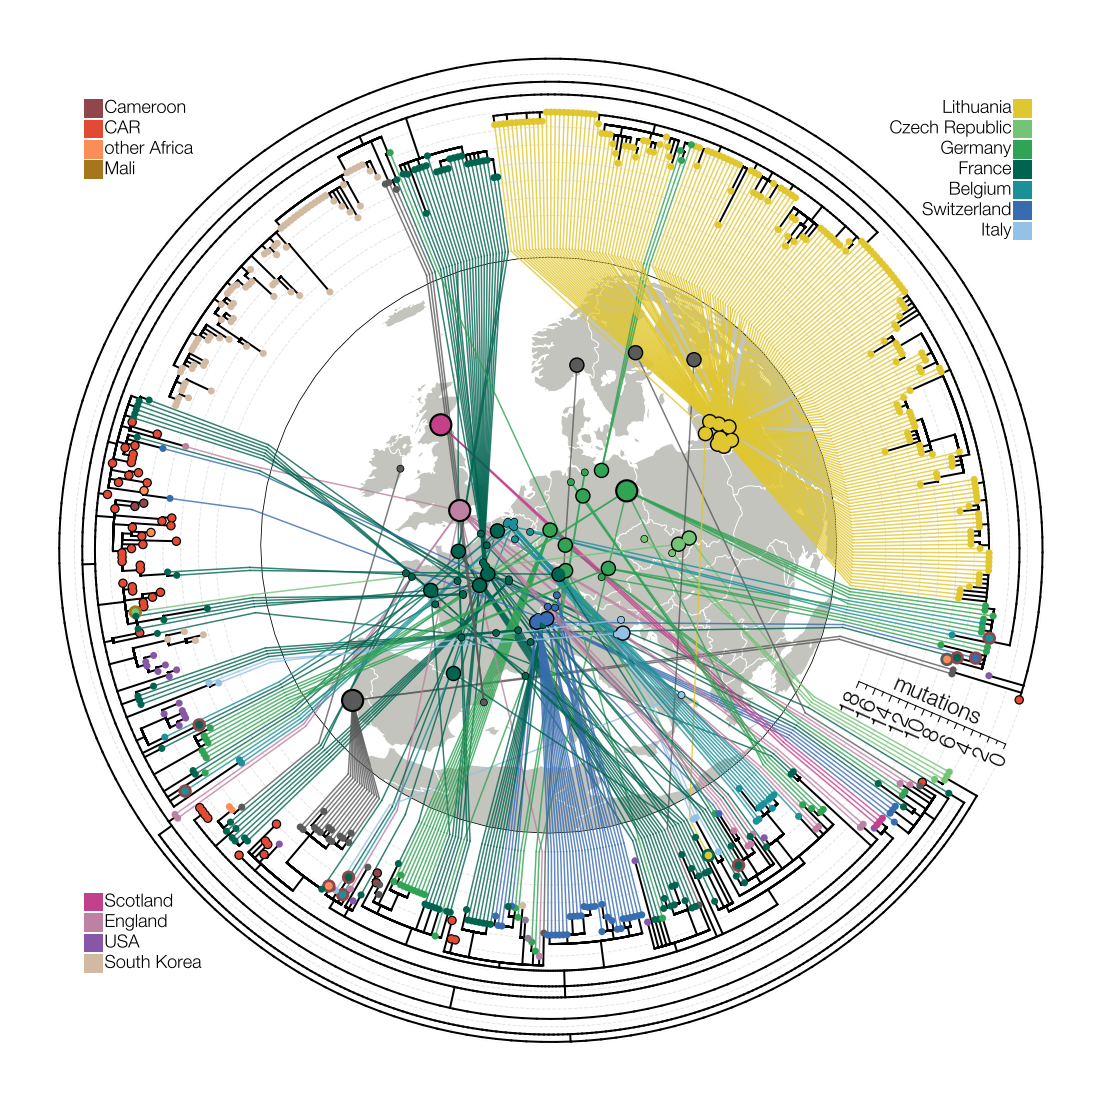

In [2]:
def polar_transform(ax,tree,circStart=0.0,circFrac=1.0,inwardSpace=0.0,precision=20):
    """
    Given axes and a baltic tree object plot a circular tree.
    """
    x_attr=lambda k:k.x
    y_attr=lambda k:k.y
    colour='k'
    width=2
    
    if inwardSpace<0: inwardSpace-=tree.treeHeight ## if inward space is negative then tree is pointing inwards
    
    branches=[] ## will hold branch coordinates
    cs=[] ## will hold colours
    linewidths=[] ## will hold branch widths
    
    circ_s=circStart*np.pi*2 ## where circle starts
    circ=circFrac*np.pi*2 ## how long the circle is (2pi=full)

    allXs=list(map(x_attr,tree.Objects)) ## get all branch heights
    allXs.append(max(allXs)*1.1) ## add a guaranteed maximum height that's 10% bigger
    normaliseHeight=lambda value: (value-min(allXs))/(max(allXs)-min(allXs)) ## create normalisation function for height
    linspace=lambda start,stop,n: list(start+((stop-start)/(n-1))*i for i in range(n)) if n>1 else stop ## hacky linearly spaced list of floats function
    
    done=[] ## remember which coordinates were done on the map
    
    y0=circ_s-0.1 ## where scale bar will begin - where tree starts, but pulled back a bit
    x0=normaliseHeight(0+inwardSpace) ## scale bar starts at 0 (+offset)
    x1=normaliseHeight(18+inwardSpace) ## scale bar finishes at 10 (+offset)
    
    ### scale bar main line
    ax.plot([np.sin(y0)*x0,np.sin(y0)*x1],[np.cos(y0)*x0,np.cos(y0)*x1],color='k',lw=1)
    
    #### scale bar ticks
    for i in range(0,19):
        w=0.01+i*0.0005 ## tick size increases towards centre
        y_line=np.linspace(y0,y0+w,10) if i%2==0 else np.linspace(y0,y0+w/1.5,10) ## 10 segments to curve the ticks slightly, size alternates between odd and even
        
        x=normaliseHeight(i+inwardSpace) ## tick position
        ax.plot(np.sin(y_line)*x,np.cos(y_line)*x,color='k',lw=1) ## plot tick
        
        if (i)%2==0: ## every even tick
            ax.plot(np.sin(np.linspace(-np.pi,np.pi,100))*x,np.cos(np.linspace(-np.pi,np.pi,100))*x,color='lightgrey',ls='--',alpha=0.6,lw=1,zorder=0) ## plot faint full circle for labelled ticks
            ax.text(np.sin(y_line[-1]+w*2.4)*x,np.cos(y_line[-1]+w*2.4)*x,'%d'%(i),ha='center',va='center',rotation=-np.rad2deg(y_line[-1])) ## add tick label
    
    #### scale bar label
    ax.text(np.sin(y0-0.03)*np.mean([x0,x1]),np.cos(y0-0.03)*np.mean([x0,x1]),'mutations',ha='center',va='center',rotation=-np.rad2deg(y0)-90)
    
    for k in tree.Objects: ## iterate over branches
        x=normaliseHeight(x_attr(k)+inwardSpace) ## get branch x position
        xp=normaliseHeight(x_attr(k.parent)+inwardSpace) if k.parent.parent else x ## get parent x position
        y=y_attr(k) ## get y position
        
        try: ## try getting colour
            cs.append(colour(k)) if callable(colour) else cs.append(colour)
        except KeyError: ## grey if failed
            cs.append((0.7,0.7,0.7))
        linewidths.append(width(k)) if callable (width) else linewidths.append(width) ## add branch width

        y=circ_s+circ*y/tree.ySpan ## convert y coordinate
        X=np.sin(y) ## polar transform
        Y=np.cos(y) ## polar transform
        branches.append(((X*xp,Y*xp),(X*x,Y*x))) ## add branch segment
        
        if k.is_node(): ## internal node
            yl,yr=y_attr(k.children[0]),y_attr(k.children[-1]) ## get leftmost and rightmost children's y coordinates
            yl=circ_s+circ*yl/tree.ySpan ## transform y into a fraction of total y for left child
            yr=circ_s+circ*yr/tree.ySpan ## same for right child
            ybar=linspace(yl,yr,precision) ## what used to be vertical node bar is now a curved line

            xs=[yx*x for yx in np.sin(ybar)] ## convert to polar coordinates
            ys=[yy*x for yy in np.cos(ybar)] ## convert to polar coordinates

            branches+=tuple(zip(zip(xs,ys),zip(xs[1:],ys[1:]))) ## add curved segment
            
            linewidths+=[linewidths[-1] for q in zip(ys,ys[1:])] ## repeat linewidths
            cs+=[cs[-1] for q in zip(ys,ys[1:])] ## repeat colours
        else: ## external node/tip
            strain=k.name.split('|')[0] if len(k.name.split('|'))>1 else '' ## get name
            
            if strain in locs: ## coordinate available for tip
                lat,lon,size=coordinates[locs[strain]] ## fish out coordinates for tip
                s=50 ## size of marker
                
                country=strain.split('/')[1] ## get country

                country='CAR' if country=='Central_African_Republic' else country
                country='DRC' if country=='Democratic_Republic_of_the_Congo' else country ## standardise country names
                
                fc=colours[country.replace('_',' ')] ## get colour for tip
                ec='k' ## get edge colour for tip
                scale=1.8 ## set edge line size
                if strain in travel: ## tip is from a traveller
                    s*=1.2 ## increase marker size
                    scale=3 ## increase edge line size
                    ec=colours[travel[strain]] ## get new edge colour
                
                ax.scatter(X*x,Y*x,s=s,facecolor=fc,edgecolor='none',zorder=10000) ## plot main marker
                
                if strain in travel or country in ['CAR','Cameroon','Equatorial_Guinea', 'DRC']: ## only mark the outside of the tip if it's a traveller or an African sequence
                    ax.scatter(X*x,Y*x,s=s*scale,facecolor=ec,edgecolor='none',zorder=9999) ## tip circle
                
                if locs[strain] in ['Maryland','West_Virginia','Minnesota','Michigan','Texas','Illinois','Washington','New_Jersey','Indiana','Alberta','Central_African_Republic','Gabon','Lambarene','CAR','Equatorial_Guinea', 'DRC','Cameroon','Bangui','Bayanga','Yaounde','Kinshasa','Accra','Hong_Kong','South_Korea','Philippines','Central_Visayas']: ## don't plot locations not in Europe
                    pass
                else: ## tip in Europe, plot location on a map, connect to tree with a line
#                     print(locs[strain])
                    latT,lonT=ortho.transform_point(lon, lat, ccrs.PlateCarree()) ## get location of tip in current projection coordinates
                    
                    al=0.8 ## connection lines will be slightly transparent
                    lw=1.5 ## connection lines will be slightly thicker than regular
                    ls='-' ## connection lines entire
                    treeEnd=normaliseHeight(ll.treeHeight*1.01+inwardSpace) ## coordinate that sticks out a bit past the tree's highest point
                    
                    ax.plot([X*treeEnd,X*x],[Y*treeEnd,Y*x],color=fc,ls=ls,lw=lw,alpha=al) ## draw line departing each tip and going off to some high point
                    
                    con = ConnectionPatch(xyA=(X*treeEnd,Y*treeEnd), ## connect end of the line that departed a tip
                                          coordsA=ax.transData, ## coordinate provided is in dat aspace
                                          axesA=ax, ## tree part of the plot
                                          xyB=(latT,lonT), ## connect to map
                                          coordsB=ax2.transData, ## in map coordinates
                                          axesB=ax2, ## map part of the plot
                                          color=fc, ls=ls,lw=lw,zorder=3,alpha=al) ## colour, line style, linewidth, order, transparency
                    ax2.add_patch(con) ## add line to plot
                    
                    s=loc_size[size]**2 ## square marker size
                    if (lon,lat) not in done: ## haven't done map coordinate before
                        ax2.scatter(lon,lat,s=40*s,facecolor=fc,edgecolor='none', ## plot circle on map
                                   zorder=10000,transform=ccrs.PlateCarree(),clip_on=False) 
                        ax2.scatter(lon,lat,s=60*s,facecolor='k',edgecolor='none', ## plot outline circles on map
                                   zorder=9999,transform=ccrs.PlateCarree(),clip_on=False)
                        done.append((lon,lat)) ## remember coordinate was done
    
    line_segments = LineCollection(branches,lw=linewidths,ls='-',color=cs,capstyle='projecting',zorder=2) ## create line segments that will be tree branches
    ax.add_collection(line_segments) ## add collection to axes
    
    line_segments = LineCollection(branches,lw=[lw*3 for lw in linewidths],ls='-',color=['w' for c in cs],capstyle='projecting',zorder=1) ## create line segments that will be a white outline to tree branches
    ax.add_collection(line_segments) ## add collection to axes


country_order=['Lithuania','Germany','Finland','Norway','Sweden','Cameroon','Ghana','France','Scotland','England','Ireland','Belgium','Portugal','South_Korea','Central_African_Republic','Italy','Spain','Cameroun','DRC','Equatorial_Guinea','Gabon','USA','Canada','Philippines','Hong_Kong','Switzerland','Czech_Republic']

# ll.root.children=sorted(ll.root.children,key=lambda w: np.mean([country_order.index(lf.split('|')[0].split('/')[1]) for lf in w.leaves]) if w.is_node() else country_order.index(w.name.split('|')[0].split('/')[1])) ## sort children of root based on mean index of each child
# ll.root.children[0].children=sorted(ll.root.children[0].children,key=lambda w: (np.mean([country_order.index(lf.split('|')[0].split('/')[1]) for lf in w.leaves]) if w.is_node() else country_order.index(w.name.split('|')[0].split('/')[1])) if w.y<ll.ySpan/2 else (-np.mean([country_order.index(lf.split('|')[0].split('/')[1]) for lf in w.leaves]) if w.is_node() else len(country_order)-country_order.index(w.name.split('|')[0].split('/')[1]))) ## sort children of root based on mean index of each child
ll.root.children[-2].children[0].children=sorted(ll.root.children[-2].children[0].children,key=lambda w: np.mean([country_order.index(lf.split('|')[0].split('/')[1]) for lf in w.leaves]) if w.is_node() else country_order.index(w.name.split('|')[0].split('/')[1])) ## sort children of root based on mean index of each child

ll.drawTree() ## recompute coordinates of branches after sorting

    

fig,ax = plt.subplots(figsize=(20,20),facecolor='w')

gs = GridSpec(1,1,hspace=0.01,wspace=0.0)
ax=plt.subplot(gs[0],zorder=1000,facecolor='none')


############
ortho=ccrs.NearsidePerspective(central_longitude=7,central_latitude=50,satellite_height=800000) ## projection

w=0.3
ax2=fig.add_axes([(1-w)/2, (1-w)/2, w, w],facecolor='none',projection=ortho,zorder=0) ## add sub-axes

[ax2.spines[loc].set_visible(False) for loc in ax.spines] ## no spines for the plot

p1 = ax.get_position()
p2 = ax2.get_position()

scale=2
w=0.4
# ax2.set_position([(1-w)/2+0.011, (1-w)/2+0.002, w, w]) ## adjust position of map subplot, it's not perfectly centered
ax2.set_position([(1-w)/2+0.011, (1-w)/2+0.006, w, w]) ## adjust position of map subplot, it's not perfectly centered

## map scale and colour
scale='50m'
# water='#CED6D9'
water='w'
# land='#848E86'
land='#C2C4BD'

## add water bodies, continents and country borders
ax2.add_feature(cartopy.feature.LAKES.with_scale(scale),facecolor=water)
ax2.add_feature(cartopy.feature.OCEAN.with_scale(scale),facecolor=water,edgecolor=water)
ax2.add_feature(cartopy.feature.LAND.with_scale(scale),facecolor=land,edgecolor='w')
ax2.add_feature(cartopy.feature.BORDERS.with_scale(scale),edgecolor='w',lw=1,zorder=1)

# polar_transform(ax,ll,circStart=0.83,circFrac=0.97,inwardSpace=-18,precision=200) ## plot tree in polar coordinates
polar_transform(ax,ll,circStart=0.83,circFrac=0.97,inwardSpace=-34,precision=200) ## plot tree in polar coordinates

## legend patch sizes
h=100000
w=100000

for c,country in enumerate(['Italy','Switzerland', 'Belgium', 'France', 'Germany', 'Czech Republic', 'Lithuania'][::-1]): ## iterate over specific countries
    x=2500000 ## where legend patch starts horizontally
    y=2300000-c*h*1.1 ## where legend patch starts vertically
    fc=colours[country] ## get colour
    
    effects=[path_effects.Stroke(linewidth=4, foreground='white'),
             path_effects.Stroke(linewidth=0, foreground='k')] ## black text, white outline
    
    if country=='Equatorial Guinea': country='other Africa'
    ax2.add_patch(Rectangle((x,y),w,h,facecolor=fc,edgecolor='none',clip_on=False)) ## add coloured legend patch
    ax2.text(x-w*0.1,y+h/2,country,color='k',size=18,va='center',ha='right',path_effects=effects,zorder=1000000) ## label legend patch

    
for c,country in enumerate(['South Korea', 'USA', 'England','Scotland']): ## iterate over specific countries
    x=-2500000 ## where legend patch starts horizontally
    y=-2300000+c*h*1.1 ## where legend patch starts vertically
    fc=colours[country] ## get colour
    
    effects=[path_effects.Stroke(linewidth=4, foreground='white'),
             path_effects.Stroke(linewidth=0, foreground='k')] ## black text, white outline
    
    if country=='Equatorial Guinea': country='other Africa'
    ax2.add_patch(Rectangle((x,y),w,h,facecolor=fc,edgecolor='none',clip_on=False)) ## add coloured legend patch
    ax2.text(x+w*1.1,y+h/2,country,color='k',size=18,va='center',ha='left',path_effects=effects,zorder=1000000) ## label legend patch

    
for c,country in enumerate(['Mali','Equatorial Guinea', 'CAR', 'Cameroon'][::-1]): ## iterate over specific countries
    x=-2500000 ## where legend patch starts horizontally
    y=2300000-c*h*1.1 ## where legend patch starts vertically
    fc=colours[country] ## get colour
    
    effects=[path_effects.Stroke(linewidth=4, foreground='white'),
             path_effects.Stroke(linewidth=0, foreground='k')] ## black text, white outline
    
    if country=='Equatorial Guinea': country='other Africa'
    ax2.add_patch(Rectangle((x,y),w,h,facecolor=fc,edgecolor='none',clip_on=False)) ## add coloured legend patch
    ax2.text(x+w*1.1,y+h/2,country,color='k',size=18,va='center',ha='left',path_effects=effects,zorder=1000000) ## label legend patch

    
## remove ticks and tick labels from everything
ax.set_xticks([])
ax.set_xticklabels([])
ax.set_yticks([])
ax.set_yticklabels([])

ax2.set_xticks([])
ax2.set_xticklabels([])
ax2.set_yticks([])
ax2.set_yticklabels([])


[ax.spines[loc].set_visible(False) for loc in ax.spines] ## no spines for tree plot
# [ax2.spines[loc].set_visible(False) for loc in ax2.spines]

# ax.plot()
ax.set_aspect(1)

# e=3
# ax.set_xlim(-e,e)
# ax.set_ylim(-e,e)

plt.savefig('/Users/evogytis/Documents/manuscripts/SARS-CoV-2_kitenis/figures/Fig3_travelers.png',dpi=100,bbox_inches='tight')
# plt.savefig('/Users/evogytis/Documents/manuscripts/SARS-CoV-2_kitenis/figures/Fig3_travelers.pdf',dpi=200,bbox_inches='tight')

plt.show()